In [2]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns


from surprise import SVD
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import accuracy
import os
from surprise import  Reader
from surprise.model_selection import KFold
from surprise import KNNBasic


In [3]:
rDataset=pd.read_csv("restaurant_ratings.txt",delimiter="\t",names=["user","item","rating","timestamp"])
rDataset

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
def modelTesting(trainset,testset):
#     i=1
#     svdRMSE=0
#     svdMAE=0pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,useMAE,itemRMSE,itemMAE=0
    
#     for trainset, testset in kf.split(data):
#     print("===="*5+"Training Set={}".format(i)+"===="*5)
    print("****"*20)
    algo=SVD()
    print("Singular Value Decomposition")
    print()
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error and Mean Absolute Error 
    print("===="*20)
    svdRMSE= accuracy.rmse(predictions, verbose=True)
    print("----"*20)
    svdMAE= accuracy.mae(predictions, verbose=True)
    print("===="*20)
    print()
#     svd=tuple(svdRMSE,svdMAE)


    print("Probabilistic Matrix Factorization")
    print()
    algo=SVD(biased=False)
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error and Mean Absolute Error 
    print("===="*20)
    pmfRMSE= accuracy.rmse(predictions, verbose=True)
    print("----"*20)
    pmfMAE= accuracy.mae(predictions, verbose=True)
    print("===="*20)
    print()
#     pmf=tuple(pmfRMSE,pmfMAE)


    print("Non-negative Matrix Factorization")
    print()
    algo=NMF()
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error and Mean Absolute Error 
    print("===="*20)
    nmfRMSE= accuracy.rmse(predictions, verbose=True)
    print("----"*20)
    nmfMAE= accuracy.mae(predictions, verbose=True)
    print("===="*20)
    print()
#     nmf=tuple(nmfRMSE,nmfMAE)

    print("User based Collaborative Filtering algorithm")
    print()
    algo=KNNBasic(sim_options = {'user_based': True })
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error and Mean Absolute Error 
    print("===="*20)
    userRMSE=accuracy.rmse(predictions, verbose=True)
    print("----"*20)
    userMAE=accuracy.mae(predictions, verbose=True)
    print("===="*20)
    print()
#     user=tuple(userRMSE,userMAE)

    print("Item based Collaborative Filtering algorithm")
    print()
    algo=KNNBasic(sim_options = {'user_based': False })
    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error and Mean Absolute Error 
    print("===="*20)
    itemRMSE=accuracy.rmse(predictions, verbose=True)
    print("----"*20)
    itemMAE=accuracy.mae(predictions, verbose=True)
    print("===="*20)
    print()
#     itemx=tuple(itemRMSE,itemMAE)


    print("++++"*20)
    print()
    print()
#     i+=1
    return svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE
        
    

In [5]:
def singleModelAvg(mainTrainSet, mainTestSet,algo):
    rmseSum=0
    maeSum=0
    for i in range(len(mainTrainSet)):
        algo.fit(mainTrainSet[i])
        predictions = algo.test(mainTestSet[i])

        # Compute and print Root Mean Squared Error and Mean Absolute Error 
        print("===="*20)
        rmseSum+=accuracy.rmse(predictions, verbose=True)
        print("----"*20)
        maeSum+=accuracy.mae(predictions, verbose=True)
        print("===="*20)
        print()
    print("Avg Mean of RMSE ={}".format(rmseSum/len(mainTrainSet)))
    print("Avg Mean of MAE ={}".format(maeSum/len(mainTrainSet)))
    
    return rmseSum/len(mainTrainSet),maeSum/len(mainTrainSet)
        

In [17]:
file_path = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_from_file(file_path, reader=reader)
# print(len(data))
kf = KFold(n_splits=2,random_state=0,shuffle=True)

mainTrainSet=[]
mainTestSet=[]

TypeError: object of type 'DatasetAutoFolds' has no len()

In [13]:
for trainset, testset in kf.split(data):
    mainTrainSet.append(trainset)
    mainTestSet.append(testset)
print(len(mainTrainSet))
print(len(mainTestSet))

2
2


In [16]:
mainTestSet[0]

50000

-----------------------------------------------------------------------------------------------------------------

Que 10: - Compare the performances of User-based collaborative filtering, item-based collaborative filtering, SVD, PMF, NMFon fold-1with respect to RMSE and MAE. Since data.split(n_folds=3)randomly split the data into 3 folds, please make sure you testthe five algorithms on the same fold-1 so the results are comparable. 

********************************************************************************
Singular Value Decomposition

RMSE: 0.9474
--------------------------------------------------------------------------------
MAE:  0.7480

Probabilistic Matrix Factorization

RMSE: 0.9696
--------------------------------------------------------------------------------
MAE:  0.7631

Non-negative Matrix Factorization

RMSE: 0.9836
--------------------------------------------------------------------------------
MAE:  0.7710

User based Collaborative Filtering algorithm

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9941
--------------------------------------------------------------------------------
MAE:  0.7841

Item based Collaborative Filtering algorithm

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9872
--------------------------------------------------------------------------------
MAE:  0.7813

++++++++++++++++++++++++++++++++++++++++

Text(0.5, 1.0, 'Algorith Comparison - Fold 1')

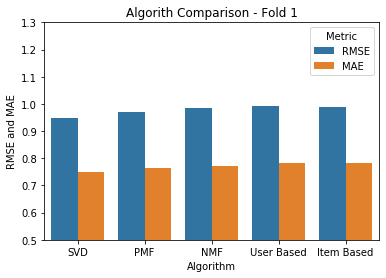

In [8]:
svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE=modelTesting(mainTrainSet[0],mainTestSet[0])
graphModel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric")
x.set_ylim([.5,1.3])
x.set_title("Algorith Comparison - Fold 1" ,loc="center")


<b>Ans: - </b><br>
As per the observation <b>Singular Value Decomposition(SVD) has lowest RMSE and MAE.</b>

-----------------------------------------------------------------------------------------------------------------

Que 11: - Compare the performances of User-based collaborative filtering, item-based collaborative filtering, SVD, PMF, NMF on fold-2 with respect to RMSE and MAE. Please make sure you test the five algorithms on the same fold-2 so the results are comparable.

In [9]:
svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE=modelTesting(mainTrainSet[1],mainTestSet[1])
graphModel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric")
x.set_ylim([.5,1.3])
x.set_title("Algorith Comparison - Fold 2" ,loc="center")

********************************************************************************
Singular Value Decomposition

RMSE: 0.9390
--------------------------------------------------------------------------------
MAE:  0.7412

Probabilistic Matrix Factorization



KeyboardInterrupt: 

<b>Ans: - </b><br>
As per the observation <b>Singular Value Decomposition(SVD) has lowest RMSE and MAE.</b>

-----------------------------------------------------------------------------------------------------------------

Que 12: - Compare the performances of User-based collaborative filtering, item-based collaborative filtering, SVD, PMF, NMF on fold-3 with respect to RMSE and MAE. Please make sure you test the five algorithms on the same fold-3 so the results are comparable. 

In [ ]:
svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE=modelTesting(mainTrainSet[2],mainTestSet[2])
graphModel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdRMSE,svdMAE,pmfRMSE,pmfMAE,nmfRMSE,nmfMAE,userRMSE,userMAE,itemRMSE,itemMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric")
x.set_ylim([.5,1.3])
x.set_title("Algorith Comparison - Fold 3" ,loc="center")

<b>Ans: - </b><br>
As per the observation <b>Singular Value Decomposition(SVD) has lowest RMSE and MAE.</b>

-----------------------------------------------------------------------------------------------------------------

Que 13: - Compare the average(mean)performances of User-based collaborative filtering, item-based collaborative filtering, SVD, PMF, NMF with respect to RMSE and MAE.  Please make sure you test the five algorithms on the same3-folddata split plan so the results are comparable. 

<b>SVD</b>

In [ ]:
svdAvgRMSE,svdAvgMAE=singleModelAvg(mainTrainSet,mainTestSet,SVD())

<b>PMF</b>

In [ ]:
pmfAvgRMSE,pmfAvgMAE=singleModelAvg(mainTrainSet,mainTestSet,SVD(biased=False))

<b>NMF</b>

In [ ]:
nmfAvgRMSE,nmfAvgMAE=singleModelAvg(mainTrainSet,mainTestSet,NMF())

<b>User based Collaborative Filtering algorithm</b>

In [ ]:
userAvgRMSE,userAvgMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'user_based': True }))

<b>Item based Collaborative Filtering algorithm</b>

In [ ]:
itemAvgRMSE,itemAvgMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'user_based': False }))

In [ ]:
graphModel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdAvgRMSE,svdAvgMAE,pmfAvgRMSE,pmfAvgMAE,nmfAvgRMSE,nmfAvgMAE,userAvgRMSE,userAvgMAE,itemAvgRMSE,itemAvgMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric")
x.set_ylim([.5,1.1])
x.set_title("Algorith Comparison - Mean" ,loc="center")

<b>Ans: - </b><br>
As per the observation <b>Singular Value Decomposition(SVD) has lowest RMSE and MAE.<b>

-----------------------------------------------------------------------------------------------------------------

Que 14: - Examine how the cosine, MSD(Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.
1. MSD Similarity
2. Cosine Similarity
3. Pearson Similarity

<b>User based Collaborative Filtering => MSD Similarity</b>

In [ ]:
userMSDRMSE,userMSDMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'user_based': True }))

<b>User based Collaborative Filtering => Cosine Similarity</b>

In [ ]:
userCosineRMSE,userCosineMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'name':'cosine','user_based': True }))

<b>User based Collaborative Filtering => Pearson Similarity</b>

In [ ]:
userPearsonRMSE,userPearsonMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'name':'pearson','user_based': True }))

-----------------------------------------------------------------------------------------------------------------

<b>Item based Collaborative Filtering => MSD Similarity</b>

In [ ]:
itemMSDRMSE,itemMSDMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'user_based': False }))

<b>Item based Collaborative Filtering => Cosine Similarity</b>

In [ ]:
itemCosineRMSE,itemCosineMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'name':'cosine','user_based': False }))

<b>Item based Collaborative Filtering => Pearson Similarity</b>

In [ ]:
itemPearsonRMSE,itemPearsonMAE=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(sim_options = {'name':'pearson','user_based': False }))

In [ ]:
graphModel = {
    'Algorithm': ('User MSD','User MSD','User Cosine', 'User Cosine','User Pearson','User Pearson'), 
    'RMSE and MAE': [userMSDRMSE,userMSDMAE,userCosineRMSE,userCosineMAE,userPearsonRMSE,userPearsonMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric",)
x.set_ylim([.5,1.1])
x.set_title("User Based Collaborative Filtering - Similarity Metrics" ,loc="center")

In [ ]:
graphModel = {
    'Algorithm': ('Item MSD','Item MSD','Item Cosine', 'Item Cosine','Item Pearson','Item Pearson'), 
    'RMSE and MAE': [itemMSDRMSE,itemMSDMAE,itemCosineRMSE,itemCosineMAE,itemPearsonRMSE,itemPearsonMAE],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}
df = pd.DataFrame(graphModel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=df,hue="Metric",)
x.set_ylim([.5,1.1])
x.set_title("Item Based Collaborative Filtering - Similarity Metrics" ,loc="center")

<b>Ans: - </b><br>
As per the observation, <b>MSD similarity gives the lowest RMSE and MAE </b>for the User-Based Collaborative Filtering and Item Based Collaborative Filtering.

-----------------------------------------------------------------------------------------------------------------

Que 15: - Examine how the number of neighbors impacts the performances of User based Collaborative Filteringor Item based Collaborative Filtering?Plot your results. 

In [ ]:
KRMSE=[]
KMAE=[]
maxValue=30
for i in range(1,maxValue):
    rmse,mae=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(k=i, sim_options = {'user_based': True }))
    KRMSE.append(rmse)
    KMAE.append(mae)

In [ ]:

knnRMSE = {
    'KNN K Value': [y for y in range(1,maxValue)], 
    'RMSE': KRMSE
}
df=pd.DataFrame(knnRMSE)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="Blue")
graph.set_ylim([.9,1.35])
graph.set_title("RMSE Values")

In [ ]:
knnMAE = {
    'KNN K Value': [y for y in range(1,maxValue)], 
    'MAE': KMAE
}
df=pd.DataFrame(knnMAE)
graph = sns.barplot(x="KNN K Value",y="MAE",data=df,color="Red")
graph.set_ylim([.75,1.0])
graph.set_title("MAE Values")

In [ ]:
bestKvalue=KRMSE.index(min(KRMSE))+1
print("Best Value for K = {}".format(bestKvalue))
print("RMSE = {}".format(min(KRMSE)))

<b>Ans: - </b><br>
Best value of k for User based Collaborative Filtering is <b>25</b>.

-----------------------------------------------------------------------------------------------------------------

In [ ]:
iKRMSE=[]
iKMAE=[]
maxValue=30
for i in range(1,maxValue):
    rmse,mae=singleModelAvg(mainTrainSet,mainTestSet,KNNBasic(k=i, sim_options = {'user_based': False }))
    iKRMSE.append(rmse)
    iKMAE.append(mae)

In [ ]:
knnRMSE = {
    'KNN K Value': [y for y in range(1,maxValue)], 
    'RMSE': iKRMSE
}
df=pd.DataFrame(knnRMSE)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="Blue")
graph.set_ylim([.9,1.5])
graph.set_title("RMSE Values")

In [ ]:
knnMAE = {
    'KNN K Value': [y for y in range(1,maxValue)], 
    'MAE': iKMAE
}
df=pd.DataFrame(knnMAE)
graph = sns.barplot(x="KNN K Value",y="MAE",data=df,color="Red")
graph.set_ylim([.75,1.1])
graph.set_title("MAE Values")

In [ ]:
bestKvalue=iKRMSE.index(min(iKRMSE))
print("Best Value for K = {}".format(bestKvalue))
print("RMSE = {}".format(min(iKRMSE)))

<b>Ans: - </b><br>
Best value of k for Item based Collaborative Filtering is <b>29</b>.

-----------------------------------------------------------------------------------------------------------------

colab code link - https://colab.research.google.com/drive/1oHuAR-iOHpCxuwGGM4gRsOJZseTYa_JK

In [ ]:
print(KRMSE[24])

In [ ]:
print(KRMSE[25])